In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb


In [ ]:
df = pd.read_csv('/content/nba_2022-23_all_stats_with_salary.csv')
df.head()

,Unnamed: 0,Player Name,Salary,Position,Age,Team,GP,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [ ]:
df.drop(columns=['Player Name'],inplace=True,axis=1)
df.head()

,Unnamed: 0,Salary,Position,Age,Team,GP,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,48070014,PG,34,GSW,56,56,34.7,10.0,20.2,...,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
1,1,47345760,PG,32,LAC,34,3,22.2,4.1,9.9,...,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
2,2,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,13.6,...,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
3,3,44474988,PF,38,LAL,55,54,35.5,11.1,22.2,...,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
4,4,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,18.3,...,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9


In [ ]:
# One-hot encode categorical features
cat_features = ['Team', 'Position']
encoded_cat_features = pd.get_dummies(df[cat_features], drop_first=True)

In [ ]:
encoded_cat_features.head()

,Team_BOS,Team_BOS/OKC,Team_BOS/TOR,Team_BRK,Team_BRK/DAL,Team_BRK/DET,Team_BRK/LAC,Team_BRK/MIA,Team_BRK/PHO,Team_BRK/SAC,...,Team_WAS,Team_WAS/TOR,Position_PF,Position_PG,Position_PG-SG,Position_SF,Position_SF-PF,Position_SF-SG,Position_SG,Position_SG-PG
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load data
data = pd.read_csv('/content/nba_2022-23_all_stats_with_salary.csv')

# Select numerical features to impute
num_features = ['3P%', 'eFG%', '2P%', 'FG%', 'FTr', '3PAr', 'TS%', 'FT%']

# Calculate median for each feature
imputer = SimpleImputer(strategy='median')
imputer.fit(data[num_features])
median_values = imputer.statistics_

# Fill missing values with median
filled_num_features = imputer.transform(data[num_features])

# Replace original columns with filled columns
data[num_features] = filled_num_features

In [ ]:
print(pd.DataFrame(filled_num_features, columns=num_features).isnull().sum())

3P%     0
eFG%    0
2P%     0
FG%     0
FTr     0
3PAr    0
TS%     0
FT%     0
dtype: int64


In [ ]:
# Scale numerical features
scale_features = ['Age', 'FG','FGA','FGA','FG%','3P','3P%','2P','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','PF','PER','3PAr','FTr','ORB%','DRB%','TRB%','AST%','ORB%','ORB%','ORB%','STL%','BLK%','TOV%','TS%','USG%','OWS','DWS','WS','WS/48','OBPM','DBPM','BPM','VORP','TOV','3PA','2PA','GP','GS','MP','Total Minutes']
scaler = MinMaxScaler()
scaler.fit(df[scale_features])
scaled_features = scaler.transform(df[scale_features])

In [ ]:
# Concatenate features
X = np.concatenate((encoded_cat_features, filled_num_features, scaled_features), axis=1)
y = df['Salary']

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train XGBoost model
model = xgb.XGBRegressor()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 500],
    'max_depth': [3, 4, 5, 6, 7]
    #if you want to add more parameters you can add them

}
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
#BUILD MODEL
import xgboost as xgb


In [ ]:
# Perform GridSearchCV
model_cv_xgb = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)
model_cv_xgb.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters: ", model_cv_xgb .best_params_)
print("Best Score: ", model_cv_xgb .best_score_)

# Make predictions using the best model
y_pred = model_cv_xgb.predict(X_test)

# Calculate mean squared error on the test set
mse = mean_squared_error(y_test , y_pred)
print("Mean Squared Error on Test Set: ", mse)

Best Parameters:  {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Score:  0.7253137752691808
Mean Squared Error on Test Set:  38192383549103.27


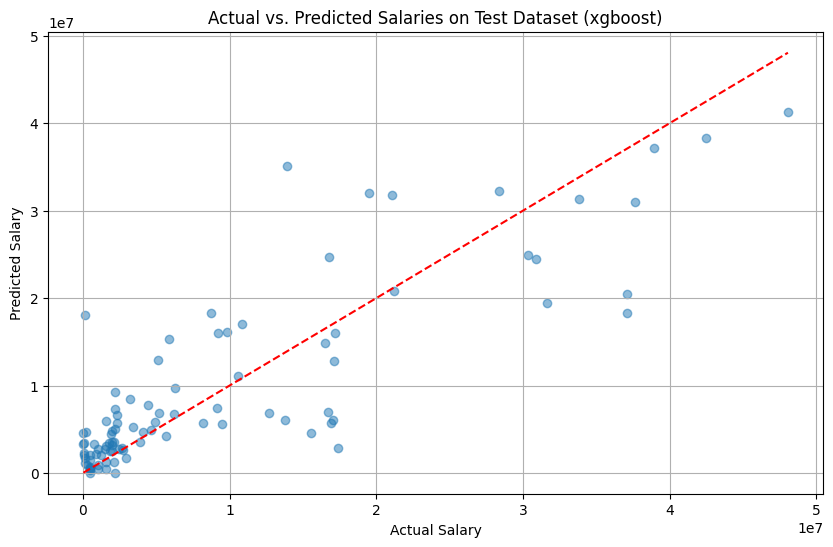

Mean Squared Error (MSE): 38192383549103.2734


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Salaries on Test Dataset (xgboost)')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')

plt.grid(True)
plt.show()

# Print MSE and R2
print(f'Mean Squared Error (MSE): {mse:.4f}')

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 45310344198321.49
Root Mean Squared Error (RMSE): 6731295.878084806
Mean Absolute Error (MAE): 4498792.164893617
R-squared (R2): 0.6587075741052194
